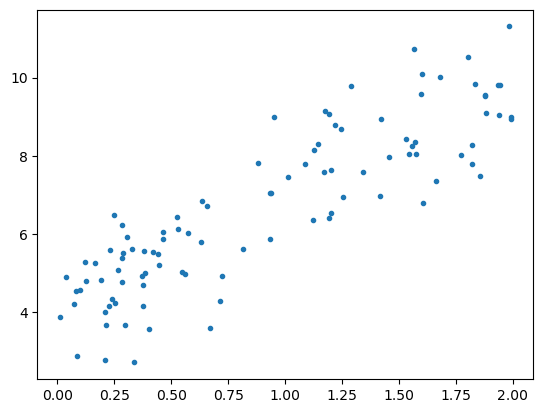

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt

m = 100
x = torch.rand(m, 1) * 2
y = x * 3 + 4 + torch.randn(m, 1)

plt.plot(x, y, '.')

In [4]:
dataset = list(zip(x, y))
loader = torch.utils.data.DataLoader(dataset, batch_size=20, shuffle=True)
for xi, yi in loader:
    break
xi.shape, yi.shape, xi.dtype, yi.dtype

(torch.Size([20, 1]), torch.Size([20, 1]), torch.float32, torch.float32)

In [14]:
# class Lin:
#     def __init__(self, in_ch, out_ch):
#         self.W = torch.randn((in_ch, out_ch), requires_grad=True)
#         self.B = torch.randn((out_ch,), requires_grad=True)

#     def forward(self, x):
#         return x @ self.W + self.B

#     def get_param(self):
#         return [self.W, self.B]

def Lin(in_ch, out_ch):
    return torch.nn.Sequential(
        torch.nn.Linear(in_ch, out_ch),
        torch.nn.ReLU()
    )

# sklearn pipeline
model = torch.nn.Sequential(
    Lin(1, 5),
    Lin(5, 5),
    torch.nn.Linear(5, 1)
)

# optimizer - 의인화 수식(함수)
# optimize(최적화) 하는 수식
opt = torch.optim.Adam(model.parameters(), lr=0.01)

loss_fn = torch.nn.MSELoss()
# loss_fn = torch.nn.functional.mse_loss

In [15]:
model

Sequential(
  (0): Sequential(
    (0): Linear(in_features=1, out_features=5, bias=True)
    (1): ReLU()
  )
  (1): Sequential(
    (0): Linear(in_features=5, out_features=5, bias=True)
    (1): ReLU()
  )
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# grad
for epoch in range(500):
    for bx, by in loader:
        # 현재 파라미터를 이용해서 예측값을 구하고 f(x) = ax+b
        pred = model(bx)
        # 에러를 구하고
        loss = loss_fn(pred, by)
        # 에러에 대해서 미분
        opt.zero_grad()
        loss.backward()
        # update
        opt.step()
    print(epoch, loss)

0 tensor(1.5035, grad_fn=<MseLossBackward0>)
1 tensor(0.9700, grad_fn=<MseLossBackward0>)
2 tensor(0.9860, grad_fn=<MseLossBackward0>)
3 tensor(1.1573, grad_fn=<MseLossBackward0>)
4 tensor(1.1890, grad_fn=<MseLossBackward0>)
5 tensor(1.1354, grad_fn=<MseLossBackward0>)
6 tensor(1.2406, grad_fn=<MseLossBackward0>)
7 tensor(0.7332, grad_fn=<MseLossBackward0>)
8 tensor(0.7633, grad_fn=<MseLossBackward0>)
9 tensor(0.7140, grad_fn=<MseLossBackward0>)
10 tensor(0.7571, grad_fn=<MseLossBackward0>)
11 tensor(0.6440, grad_fn=<MseLossBackward0>)
12 tensor(0.9618, grad_fn=<MseLossBackward0>)
13 tensor(1.1917, grad_fn=<MseLossBackward0>)
14 tensor(0.7870, grad_fn=<MseLossBackward0>)
15 tensor(1.0943, grad_fn=<MseLossBackward0>)
16 tensor(0.7759, grad_fn=<MseLossBackward0>)
17 tensor(0.7721, grad_fn=<MseLossBackward0>)
18 tensor(0.7000, grad_fn=<MseLossBackward0>)
19 tensor(0.7528, grad_fn=<MseLossBackward0>)
20 tensor(0.9659, grad_fn=<MseLossBackward0>)
21 tensor(0.8475, grad_fn=<MseLossBackward0>

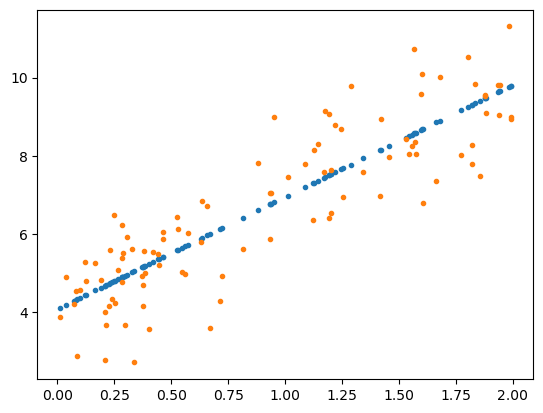

In [18]:

with torch.no_grad():
    pred = model(x)

plt.plot(x, pred, '.')

((pred - y)**2).mean()
plt.plot(x, y, '.')